In [225]:
import pandas as pd
import matplotlib.pyplot as plt

In [226]:
billDF=pd.read_csv(r'hot-100-current.csv',encoding = 'cp949')

In [227]:
billDF.head()

,chart_week,current_week,title,performer,last_week,peak_pos,wks_on_chart
0,2024-06-08,1,I Had Some Help,Post Malone Featuring Morgan Wallen,1.0,1,3
1,2024-06-08,2,Not Like Us,Kendrick Lamar,2.0,1,4
2,2024-06-08,3,Million Dollar Baby,Tommy Richman,3.0,2,5
3,2024-06-08,4,A Bar Song (Tipsy),Shaboozey,4.0,3,7
4,2024-06-08,5,Espresso,Sabrina Carpenter,6.0,4,7


In [228]:
billDF.drop('last_week',axis=1,inplace=True)
billDF.drop('peak_pos',axis=1,inplace=True)
billDF.drop('wks_on_chart',axis=1,inplace=True)
billDF

,chart_week,current_week,title,performer
0,2024-06-08,1,I Had Some Help,Post Malone Featuring Morgan Wallen
1,2024-06-08,2,Not Like Us,Kendrick Lamar
2,2024-06-08,3,Million Dollar Baby,Tommy Richman
3,2024-06-08,4,A Bar Song (Tipsy),Shaboozey
4,2024-06-08,5,Espresso,Sabrina Carpenter
...,...,...,...,...
343595,1958-08-04,96,Over And Over,Thurston Harris
343596,1958-08-04,97,I Believe In You,Robert & Johnny
343597,1958-08-04,98,Little Serenade,The Ames Brothers
343598,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams


In [229]:
bill=billDF[:2300]
bill['score']=0
bill['title']=bill['title'].str.lower()

C:\Users\kdp\AppData\Local\Temp\ipykernel_24792\1433722536.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bill['score']=0
C:\Users\kdp\AppData\Local\Temp\ipykernel_24792\1433722536.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bill['title']=bill['title'].str.lower()


In [230]:
for row in bill.index:
    bill.loc[row,'score']=101-bill.loc[row,'current_week']

In [231]:
bill_title=bill['title'].value_counts()
bill_title

title
feather                     23
stick season                23
agora hills                 23
greedy                      23
lovin on me                 23
                            ..
stranger                     1
wildflower and barley        1
scared of my guitar          1
best for me                  1
dj play a christmas song     1
Name: count, Length: 429, dtype: int64

In [232]:
bill_score=pd.DataFrame(index=['score'])
for name in bill_title.index:
    bill_score[name]=0
    for row in bill.index:
        if bill.loc[row,'title']==name:
            bill_score[name]=bill_score[name]+bill.loc[row,'score']

C:\Users\kdp\AppData\Local\Temp\ipykernel_24792\2066978497.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bill_score[name]=0
C:\Users\kdp\AppData\Local\Temp\ipykernel_24792\2066978497.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  bill_score[name]=0
C:\Users\kdp\AppData\Local\Temp\ipykernel_24792\2066978497.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

In [233]:
bill_score=bill_score.T

In [234]:
bill_score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 429 entries, feather to dj play a christmas song
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   score   429 non-null    int64
dtypes: int64(1)
memory usage: 22.9+ KB


- 과정
    * 데이터파일 확인 
        - 첫번째 줄이 컬럼명 맞는지 확인
        - 불필요한 컬럼이나 행이 있는지 확인
        - 결측치 정도 확인 
    * 데이터 전처리 : 데이터 정리 및 손질
        - 파일 확인 후 체크한 사항 진행
        - 결측치 처리
        - 이상치 처리
        - 중복데이터 처리
        - 형변환 => 실제 데이터와 타입 일치
    * 데이터 가공 : 분석하고자 하는 데이터 형태로 변환
        - 행인덱스 처리 : 멀티인덱스/컬럼=>행인덱스/행인덱스 초기화
        - 필요한 컬럼 & 행 추출
        - 추가적인 결측치/이상치/중복데이터 처리
        - 형변환 => 연속->범주형 / 범주->연속형
    * 데이터 분석
        - 탐색적 분석 : 주어진 데이터를 기반으로 의미를 찾아내는 것
        - 시각화 및 분석 결과 텍스트 요약 정리

- [1] 데이터 준비

In [235]:
df=pd.read_csv('Most Streamed Spotify Songs 2024.csv',encoding='cp1252',thousands=',')

- [2] 데이터 확인 : 행과 컬럼수, 실제 데이터와 컬럼 타입, 결측치 체크

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   int64  
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   float64
 8   Spotify Playlist Count      4530 non-null   float64
 9   Spotify Playlist Reach      4528 non-null   float64
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   float64
 12  YouTube Likes               4285 non-null   float64
 13  TikTok Posts                3427 

- [3] 데이터 전처리

In [237]:
# 노래 정보 관련 열과 틱톡 관련 열 추출
musicDF=df[['Track','Release Date','Artist','TikTok Likes','TikTok Views']].copy()

In [238]:
# 빌보드 데이터와 비교를 위해 Track열 데이터 값 소문자로 변경
musicDF['Track']=musicDF['Track'].str.lower()

In [239]:
# Track 열을 인덱스로 설정
tiktokDF = musicDF.set_index('Track').copy()
DF = tiktokDF.copy()

In [240]:
tiktokDF.corr(numeric_only=True)

,TikTok Likes,TikTok Views
TikTok Likes,1.00000,0.99253
TikTok Views,0.99253,1.00000


In [241]:
tiktokDF['Release Year'] = tiktokDF['Release Date'].str[-4:]

In [242]:
tiktokDF['Release Year'] = tiktokDF['Release Year'].astype('int')
tiktokDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4600 entries, million dollar baby to me acostumbre (feat. bad bunny)
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release Date  4600 non-null   object 
 1   Artist        4595 non-null   object 
 2   TikTok Likes  3620 non-null   float64
 3   TikTok Views  3619 non-null   float64
 4   Release Year  4600 non-null   int32  
dtypes: float64(2), int32(1), object(2)
memory usage: 197.7+ KB


In [243]:
tiktokDF.head(20)

,Release Date,Artist,TikTok Likes,TikTok Views,Release Year
Track,,,,,
million dollar baby,4/26/2024,Tommy Richman,6.515659e+08,5.332282e+09,2024
not like us,5/4/2024,Kendrick Lamar,3.522355e+07,2.083390e+08,2024
i like the way you kiss me,3/19/2024,Artemas,2.751542e+08,3.369121e+09,2024
flowers,1/12/2023,Miley Cyrus,1.078758e+09,1.460373e+10,2023
houdini,5/31/2024,Eminem,NaN,NaN,2024
lovin on me,11/10/2023,Jack Harlow,2.149435e+08,2.938687e+09,2023
beautiful things,1/18/2024,Benson Boone,2.958494e+07,5.349153e+08,2024
gata only,2/2/2024,FloyyMenor,3.385467e+08,3.804584e+09,2024
danza kuduro - cover,6/9/2024,MUSIC LAB JPN,NaN,NaN,2024


In [273]:
DF24 = tiktokDF[tiktokDF['Release Year']==2024]
DF24.info()

<class 'pandas.core.frame.DataFrame'>
Index: 693 entries, million dollar baby to ýýýýýýýýýýýý (ýýýýýýýýýýýýýý ýýýýýýýýýýýý) [prod. by wex & heysubr]
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release Date  693 non-null    object 
 1   Artist        688 non-null    object 
 2   TikTok Likes  188 non-null    float64
 3   TikTok Views  188 non-null    float64
 4   Release Year  693 non-null    int32  
dtypes: float64(2), int32(1), object(2)
memory usage: 29.8+ KB


In [245]:
DF24_like = DF24.sort_values(by=['TikTok Likes'],ascending=False).head(20)
DF24_view = DF24.sort_values(by=['TikTok Views'],ascending=False).head(20)

In [246]:
DF24_like

,Release Date,Artist,TikTok Likes,TikTok Views,Release Year
Track,,,,,
million dollar baby,4/26/2024,Tommy Richman,651565900.0,5.332282e+09,2024
texas hold 'em,2/10/2024,Beyoncï¿,485200392.0,6.518604e+09,2024
gata only,2/2/2024,FloyyMenor,338546668.0,3.804584e+09,2024
i like the way you kiss me,3/19/2024,Artemas,275154237.0,3.369121e+09,2024
future,1/10/2024,official sound studio,273236305.0,4.306270e+09,2024
smart,2/19/2024,LE SSERAFIM,234770546.0,2.059824e+09,2024
lady killers ii (christoph andersson remix),3/17/2024,G-Eazy,182937084.0,1.542242e+09,2024
nasty,4/12/2024,Tinashe,171691158.0,1.051026e+09,2024
espresso,4/12/2024,Sabrina Carpenter,169144295.0,1.379499e+09,2024


In [247]:
DF24_view

,Release Date,Artist,TikTok Likes,TikTok Views,Release Year
Track,,,,,
texas hold 'em,2/10/2024,Beyoncï¿,485200392.0,6.518604e+09,2024
million dollar baby,4/26/2024,Tommy Richman,651565900.0,5.332282e+09,2024
future,1/10/2024,official sound studio,273236305.0,4.306270e+09,2024
gata only,2/2/2024,FloyyMenor,338546668.0,3.804584e+09,2024
i like the way you kiss me,3/19/2024,Artemas,275154237.0,3.369121e+09,2024
smart,2/19/2024,LE SSERAFIM,234770546.0,2.059824e+09,2024
lady killers ii (christoph andersson remix),3/17/2024,G-Eazy,182937084.0,1.542242e+09,2024
espresso,4/12/2024,Sabrina Carpenter,169144295.0,1.379499e+09,2024
karma,4/5/2024,JoJo Siwa,134373320.0,1.314113e+09,2024


In [248]:
# 한글 폰트 설정 ==> 폰트 매니저 모듈 사용
from matplotlib import font_manager as fm
from matplotlib import rc
# 적용할 폰트 파일 
font_file = r'C:\Windows\fonts\malgunsl.ttf'

# 폰트 패밀리 이름 가져오기
font_name = fm.FontProperties(fname=font_file).get_name()

# 새로운 폰트 패밀리 이름 지정
rc('font',family=font_name)

In [249]:
DF24_like.index

Index(['million dollar baby', 'texas hold 'em', 'gata only',
       'i like the way you kiss me', 'future', 'smart',
       'lady killers ii (christoph andersson remix)', 'nasty', 'espresso',
       'karma', 'band4band (feat. lil baby)', 'blue', 'masha ultrafunk',
       'birds of a feather', 'get it sexyy',
       'tshwala bam (feat. s.n.e, eeque)', 'supernova', 'talk my shit',
       'magnetic', 'i can do it with a broken heart'],
      dtype='object', name='Track')

C:\Users\kdp\AppData\Local\Temp\ipykernel_24792\2366684651.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  like = plt.bar(num1,DF24_like['TikTok Likes']/DF24_like['TikTok Likes'][0],color = 'lightpink',width=0.3,label = '좋아요 수')
C:\Users\kdp\AppData\Local\Temp\ipykernel_24792\2366684651.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  view = plt.bar(num2,DF24_view['TikTok Views']/DF24_view['TikTok Views'][0],color = 'skyblue',width=0.3,label = '조회수')


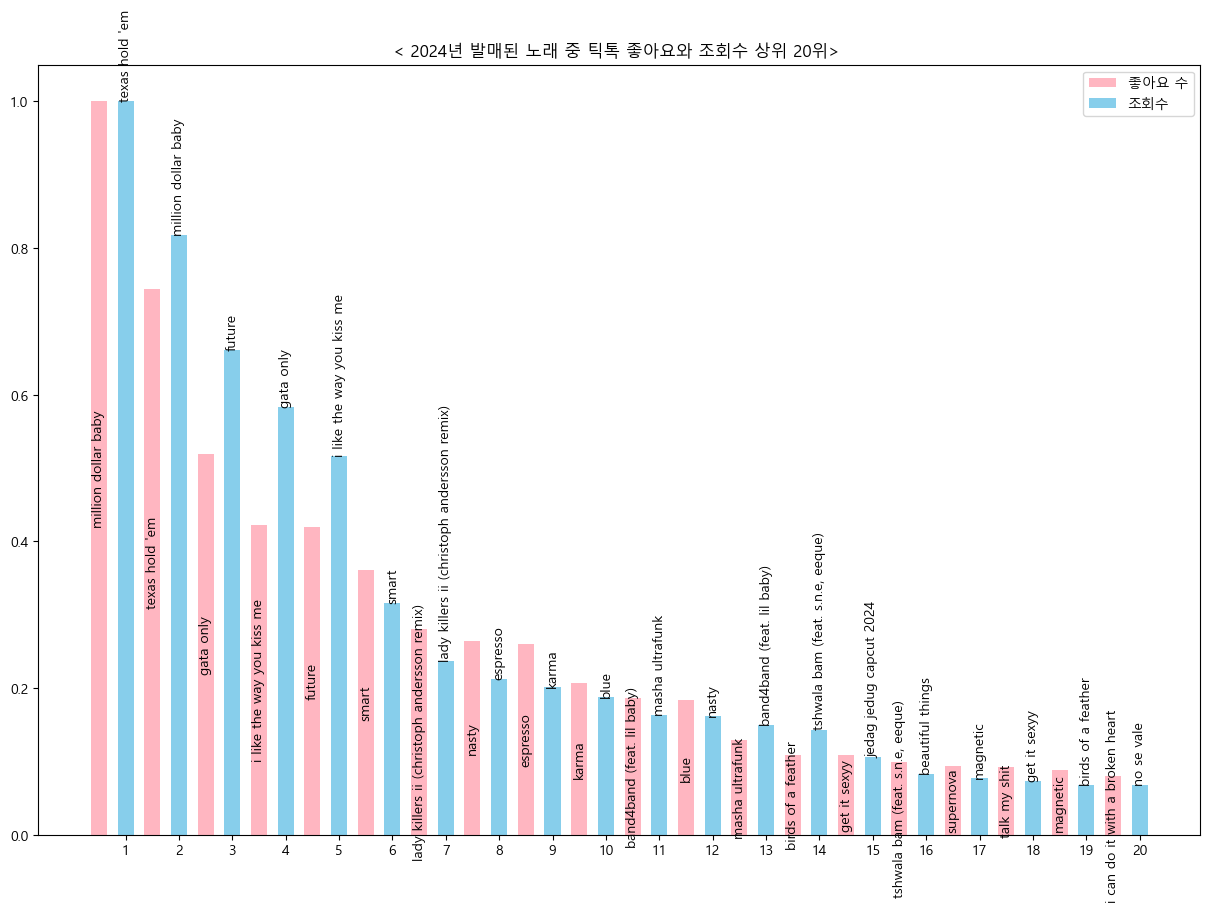

In [250]:
plt.figure(figsize=(15,10))
num1 = pd.Series(range(1,41,2))/2
num2 = pd.Series(range(1,21))
like = plt.bar(num1,DF24_like['TikTok Likes']/DF24_like['TikTok Likes'][0],color = 'lightpink',width=0.3,label = '좋아요 수')

view = plt.bar(num2,DF24_view['TikTok Views']/DF24_view['TikTok Views'][0],color = 'skyblue',width=0.3,label = '조회수')
plt.xticks(num2)
plt.title('< 2024년 발매된 노래 중 틱톡 좋아요와 조회수 상위 20위> ')

plt.bar_label(like, labels=DF24_like.index, rotation = 90, label_type='center')
plt.bar_label(view, labels=DF24_view.index, rotation = 90)
plt.legend()
plt.show()

In [251]:
DF24.corr(numeric_only=True)

,TikTok Likes,TikTok Views,Release Year
TikTok Likes,1.000000,0.964378,NaN
TikTok Views,0.964378,1.000000,NaN
Release Year,NaN,NaN,NaN


In [252]:
corrSR = DF24.corr(numeric_only=True)['TikTok Views']
corrSR

TikTok Likes    0.964378
TikTok Views    1.000000
Release Year         NaN
Name: TikTok Views, dtype: float64

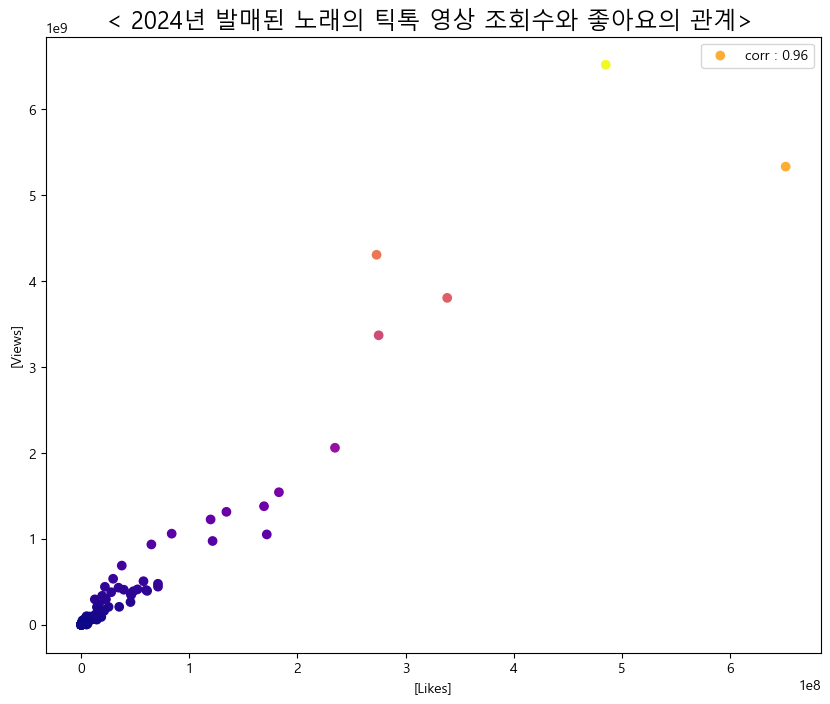

In [253]:
plt.figure(figsize=(10,8))
plt.scatter(DF24['TikTok Likes'],DF24['TikTok Views'],
            c=[DF24['TikTok Views']],cmap='plasma',
            label = f"corr : {round(corrSR['TikTok Likes'],2)}")
plt.xlabel('[Likes]')
plt.ylabel('[Views]')
plt.title('< 2024년 발매된 노래의 틱톡 영상 조회수와 좋아요의 관계> ', fontsize=17)
plt.legend()
plt.show()

In [254]:
DF24.describe()

,TikTok Likes,TikTok Views,Release Year
count,1.880000e+02,1.880000e+02,693.0
mean,2.470603e+07,2.525051e+08,2024.0
std,7.540059e+07,8.114589e+08,0.0
min,1.840000e+02,3.319000e+03,2024.0
25%,2.429500e+05,2.254531e+06,2024.0
50%,1.537722e+06,1.265000e+07,2024.0
75%,1.011160e+07,8.838451e+07,2024.0
max,6.515659e+08,6.518604e+09,2024.0


In [255]:
DF24.dropna(inplace=True)

C:\Users\kdp\AppData\Local\Temp\ipykernel_24792\3220724922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF24.dropna(inplace=True)


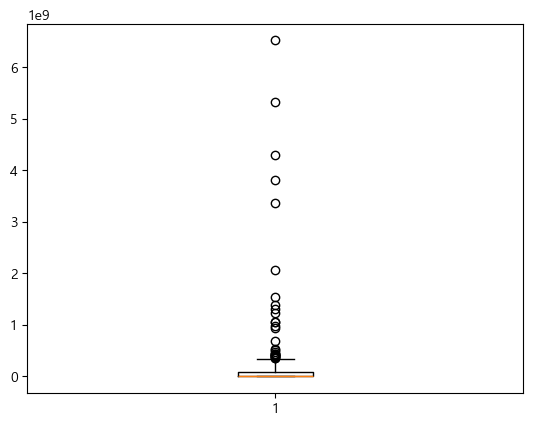

In [256]:
retDict = plt.boxplot(DF24['TikTok Views'],whis=3)
plt.show()

In [257]:
# 박스 그래프에서 받은 결과 확인
for k,v in retDict.items():
    print(k)
    for _ in v:
        print(_.get_data())

whiskers
(array([1, 1]), array([2254530.75,    3319.  ]))
(array([1, 1]), array([8.83845075e+07, 3.45797900e+08]))
caps
(array([0.9625, 1.0375]), array([3319., 3319.]))
(array([0.9625, 1.0375]), array([3.457979e+08, 3.457979e+08]))
boxes
(array([0.925, 1.075, 1.075, 0.925, 0.925]), array([ 2254530.75,  2254530.75, 88384507.5 , 88384507.5 ,  2254530.75]))
medians
(array([0.925, 1.075]), array([12650000., 12650000.]))
fliers
(array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), array([5.33228194e+09, 3.36912061e+09, 5.34915313e+08, 3.80458416e+09,
       9.74656200e+08, 3.60017000e+08, 1.22534580e+09, 1.37949900e+09,
       6.51860418e+09, 4.30626969e+09, 3.90081328e+08, 3.78313942e+08,
       4.43104700e+08, 3.93973528e+08, 5.06476590e+08, 4.31390500e+08,
       6.88302023e+08, 1.54224210e+09, 3.66905484e+08, 4.76545000e+08,
       1.05102640e+09, 4.11722900e+08, 2.05982405e+09, 1.05988060e+09,
       1.31411

In [258]:
# 하위/상위 값 추출
outliers = retDict['caps']
low_outlier = outliers[0].get_data()[1].tolist()[0]
up_outlier = outliers[1].get_data()[1].tolist()[0]
low_outlier, up_outlier

(3319.0, 345797900.0)

In [259]:
DF24[DF24['TikTok Views']>up_outlier]
# 29개 데이터

,Release Date,Artist,TikTok Likes,TikTok Views,Release Year
Track,,,,,
million dollar baby,4/26/2024,Tommy Richman,651565900.0,5.332282e+09,2024
i like the way you kiss me,3/19/2024,Artemas,275154237.0,3.369121e+09,2024
beautiful things,1/18/2024,Benson Boone,29584940.0,5.349153e+08,2024
gata only,2/2/2024,FloyyMenor,338546668.0,3.804584e+09,2024
band4band (feat. lil baby),5/23/2024,Central Cee,121574500.0,9.746562e+08,2024
lunch,5/17/2024,Billie Eilish,45889000.0,3.600170e+08,2024
blue,5/17/2024,Billie Eilish,119740900.0,1.225346e+09,2024
espresso,4/12/2024,Sabrina Carpenter,169144295.0,1.379499e+09,2024
texas hold 'em,2/10/2024,Beyoncï¿,485200392.0,6.518604e+09,2024


In [260]:
DF24 = DF24[DF24['TikTok Views']<up_outlier]

In [261]:
corrSR2 = DF24.corr(numeric_only=True)['TikTok Views']

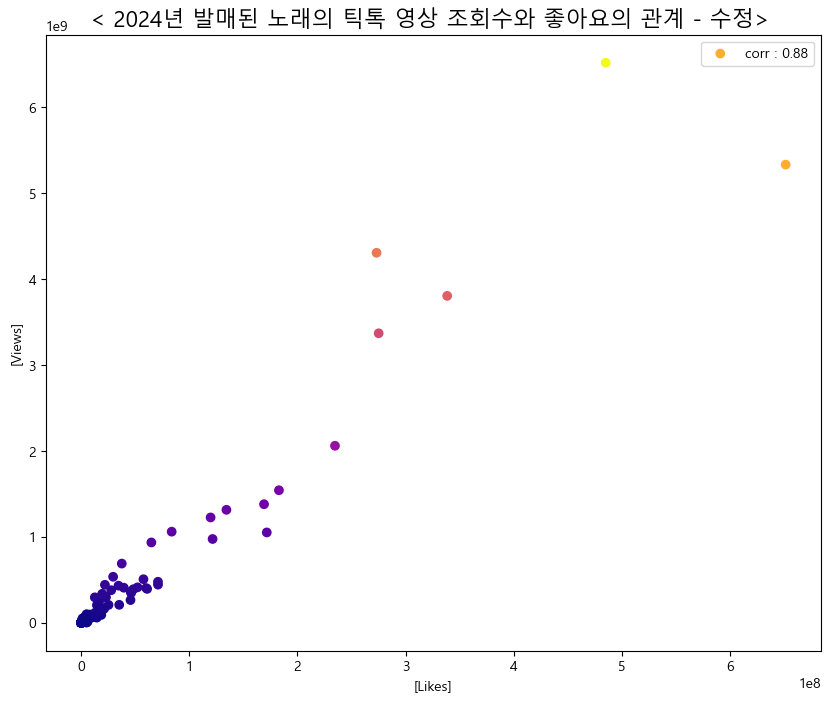

In [274]:
plt.figure(figsize=(10,8))
plt.scatter(DF24['TikTok Likes'],DF24['TikTok Views'],
            c=[DF24['TikTok Views']],cmap='plasma',
            label = f"corr : {round(corrSR2['TikTok Likes'],2)}")
plt.xlabel('[Likes]')
plt.ylabel('[Views]')
plt.title('< 2024년 발매된 노래의 틱톡 영상 조회수와 좋아요의 관계 - 수정> ', fontsize=16)
plt.legend()
plt.show()

In [263]:
DF24.corr(numeric_only=True)

,TikTok Likes,TikTok Views,Release Year
TikTok Likes,1.000000,0.875823,NaN
TikTok Views,0.875823,1.000000,NaN
Release Year,NaN,NaN,NaN


In [264]:
# 빌보드 데이터와 틱톡 데이터 합치기
dataDF=bill_score.join(DF)
dataDF

,score,Release Date,Artist,TikTok Likes,TikTok Views
feather,1487,3/17/2023,Sabrina Carpenter,35176071.0,4.430603e+08
stick season,1930,7/8/2022,Noah Kahan,29406696.0,2.750165e+08
agora hills,1862,9/22/2023,Doja Cat,88846508.0,5.444374e+08
greedy,1968,9/14/2023,Tate McRae,419319161.0,5.456156e+09
greedy,1968,9/15/2023,Tate McRae,NaN,NaN
...,...,...,...,...,...
stranger,26,NaN,NaN,NaN,NaN
wildflower and barley,13,NaN,NaN,NaN,NaN
scared of my guitar,11,NaN,NaN,NaN,NaN
best for me,8,3/18/2024,Joyner Lucas,120700.0,1.200000e+06


In [265]:
dataDF.dropna(inplace=True)
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179 entries, feather to best for me
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   score         179 non-null    int64  
 1   Release Date  179 non-null    object 
 2   Artist        179 non-null    object 
 3   TikTok Likes  179 non-null    float64
 4   TikTok Views  179 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 8.4+ KB


In [266]:
dataDF.corr(numeric_only=True)

,score,TikTok Likes,TikTok Views
score,1.000000,0.157051,0.197862
TikTok Likes,0.157051,1.000000,0.963222
TikTok Views,0.197862,0.963222,1.000000


In [267]:
corr1 = dataDF.corr(numeric_only=True)['TikTok Views']

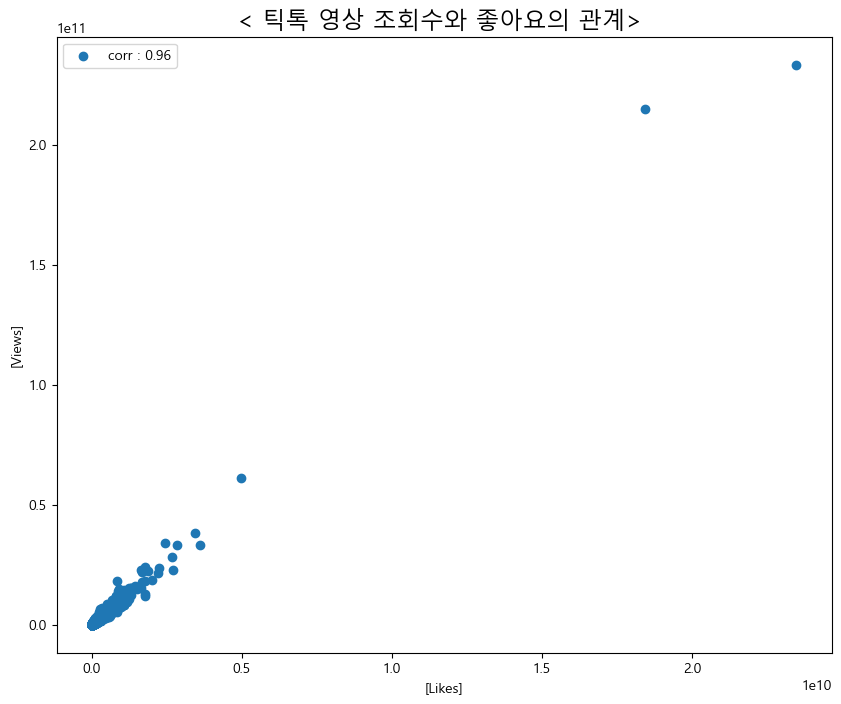

In [268]:
# 틱톡 데이터 전체에서 조회수와 좋아요 사이의 관계
plt.figure(figsize=(10,8))
plt.scatter(DF['TikTok Likes'],DF['TikTok Views'],label = f"corr : {round(corr1['TikTok Likes'],2)}")
plt.xlabel('[Likes]')
plt.ylabel('[Views]')
plt.title('< 틱톡 영상 조회수와 좋아요의 관계> ', fontsize=17)
plt.legend()
plt.show()

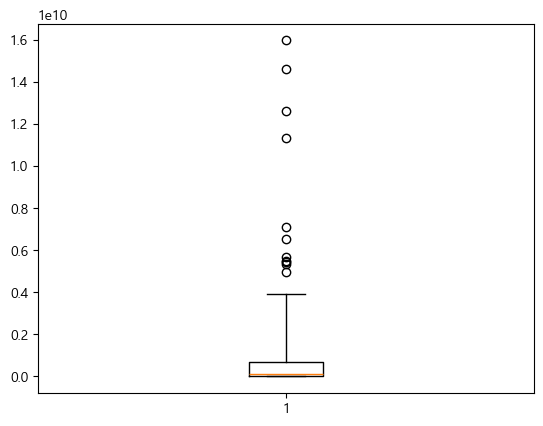

In [269]:
retDict = plt.boxplot(dataDF['TikTok Views'],whis=5)
plt.show()

In [270]:
corr2 = dataDF.corr(numeric_only=True)['score']

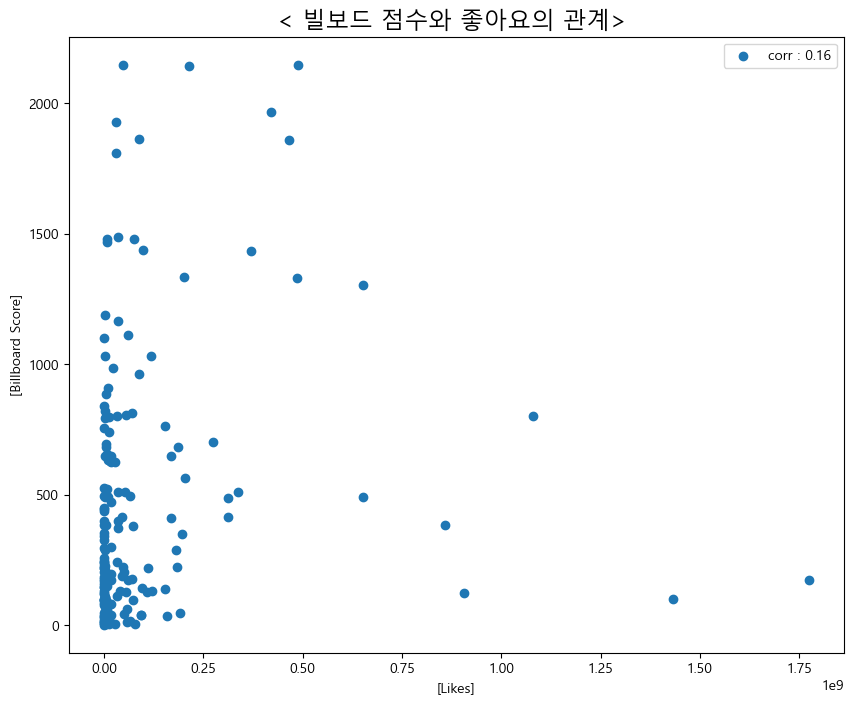

In [271]:
# 빌보드 점수와 틱톡 좋아요 사이의 관계
plt.figure(figsize=(10,8))
plt.scatter(dataDF['TikTok Likes'],dataDF['score'],label = f"corr : {round(corr2['TikTok Likes'],2)}")
plt.xlabel('[Likes]')
plt.ylabel('[Billboard Score]')
plt.title('< 빌보드 점수와 좋아요의 관계> ', fontsize=17)
plt.legend()
plt.show()

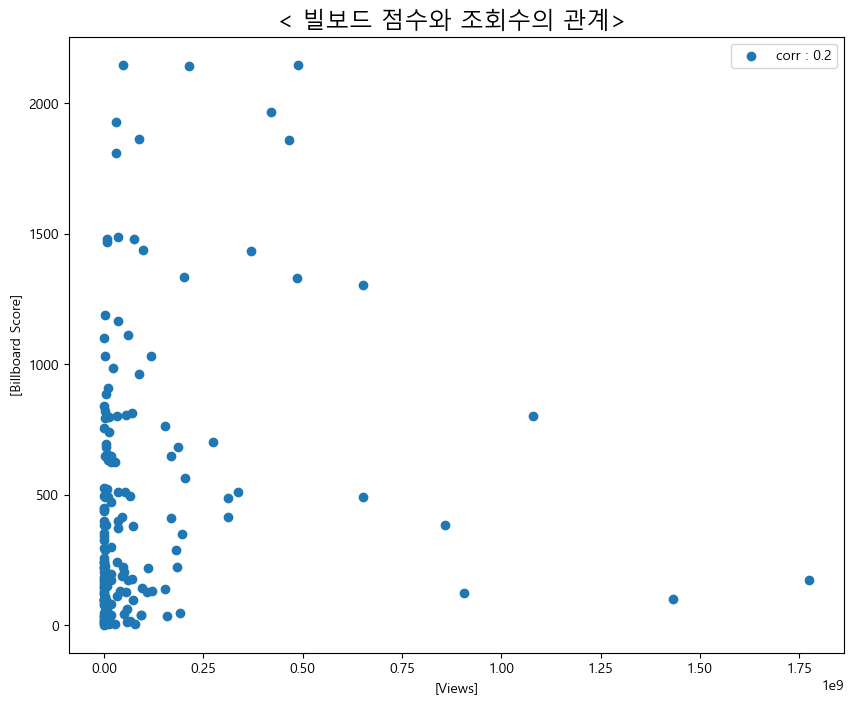

In [272]:
# 빌보드 점수와 틱톡 조회수 사이의 관계
plt.figure(figsize=(10,8))
plt.scatter(dataDF['TikTok Likes'],dataDF['score'],label = f"corr : {round(corr3['TikTok Views'],2)}")
plt.xlabel('[Views]')
plt.ylabel('[Billboard Score]')
plt.title('< 빌보드 점수와 조회수의 관계> ', fontsize=17)
plt.legend()
plt.show()